## Dragon Real Estate - Price Predictor

In [1]:
import os

In [2]:
os.getcwd()

'C:\\Users\\KIIT'

In [3]:
import pandas as pd

In [4]:
path = 'C:\\Users\\KIIT\\Desktop\\machinelearning\\'

In [5]:
housing = pd.read_csv(path+"Book.csv")

In [6]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.00
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.01
2,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.02
3,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.03
4,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.04


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    int64  
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(10), int64(4)
memory usage: 55.5 KB


In [8]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,5.060000e+02,506.0,506.00,506.0,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,506.0,506.0,5.060000e+02,5.060000e+02,5.060000e+02,506.000000
mean,6.320000e-03,18.0,2.31,0.0,5.380000e-01,6.575000e+00,6.520000e+01,4.090000e+00,1.0,296.0,1.530000e+01,3.969000e+02,4.980000e+00,24.340543
std,2.604660e-18,0.0,0.00,0.0,1.111322e-16,8.890574e-16,1.422492e-14,1.778115e-15,0.0,0.0,1.778115e-15,5.689967e-14,1.778115e-15,0.182842
min,6.320000e-03,18.0,2.31,0.0,5.380000e-01,6.575000e+00,6.520000e+01,4.090000e+00,1.0,296.0,1.530000e+01,3.969000e+02,4.980000e+00,24.000000
25%,6.320000e-03,18.0,2.31,0.0,5.380000e-01,6.575000e+00,6.520000e+01,4.090000e+00,1.0,296.0,1.530000e+01,3.969000e+02,4.980000e+00,24.205250
50%,6.320000e-03,18.0,2.31,0.0,5.380000e-01,6.575000e+00,6.520000e+01,4.090000e+00,1.0,296.0,1.530000e+01,3.969000e+02,4.980000e+00,24.320000
75%,6.320000e-03,18.0,2.31,0.0,5.380000e-01,6.575000e+00,6.520000e+01,4.090000e+00,1.0,296.0,1.530000e+01,3.969000e+02,4.980000e+00,24.434750
max,6.320000e-03,18.0,2.31,0.0,5.380000e-01,6.575000e+00,6.520000e+01,4.090000e+00,1.0,296.0,1.530000e+01,3.969000e+02,4.980000e+00,24.990000


In [9]:
%matplotlib inline

In [10]:
#import matplotlib.pyplot as plt
#housing.hist(bins=50, figsize=(20 ,15))

## Train Test Splitting

In [11]:
#For learning purpose
import numpy as np
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    test_set_size = int(len(data)* test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]
    

In [12]:
# train_set, test_set = split_train_test(housing, 0.2)

In [13]:
#print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

In [14]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 404
Rows in test set: 102



In [15]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]


In [16]:
strat_test_set['CHAS'].value_counts()

CHAS
0    102
Name: count, dtype: int64

In [17]:
strat_train_set['CHAS'].value_counts()

CHAS
0    404
Name: count, dtype: int64

In [18]:
# 95/7

In [19]:
# 378/28

In [20]:
housing = strat_train_set.copy()

## Looking for Correlations

In [21]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.0
CRIM       NaN
ZN         NaN
INDUS      NaN
CHAS       NaN
NOX        NaN
RM         NaN
AGE        NaN
DIS        NaN
RAD        NaN
TAX        NaN
PTRATIO    NaN
B          NaN
LSTAT      NaN
Name: MEDV, dtype: float64

C:\Users\KIIT\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:100: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\Users\KIIT\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:101: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\Users\KIIT\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:91: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='MEDV', ylabel='ZN'>,
        <Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='ZN', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

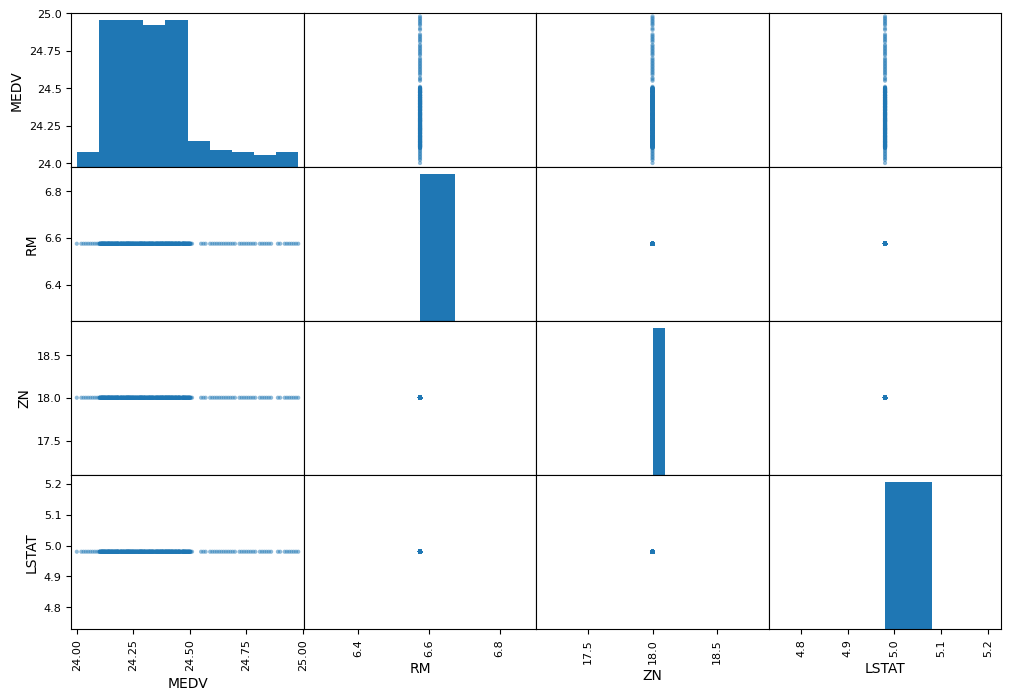

In [22]:
from pandas.plotting import scatter_matrix
attributes = [ "MEDV", "RM", "ZN", "LSTAT"]
scatter_matrix(housing[attributes],figsize = (12,8))


<Axes: xlabel='RM', ylabel='MEDV'>

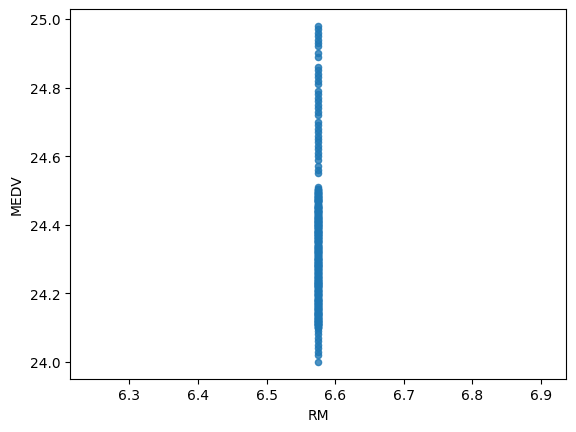

In [23]:
housing.plot(kind="scatter", x="RM", y="MEDV", alpha=0.8)

## Trying Out Attributes Combination

In [24]:
housing["TAXRM"] = housing['TAX']/housing['RM']

In [25]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
242,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.242,45.019011
354,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.354,45.019011
44,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.440,45.019011
177,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.177,45.019011
73,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.730,45.019011


In [26]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.0
CRIM       NaN
ZN         NaN
INDUS      NaN
CHAS       NaN
NOX        NaN
RM         NaN
AGE        NaN
DIS        NaN
RAD        NaN
TAX        NaN
PTRATIO    NaN
B          NaN
LSTAT      NaN
TAXRM      NaN
Name: MEDV, dtype: float64

<Axes: xlabel='TAXRM', ylabel='MEDV'>

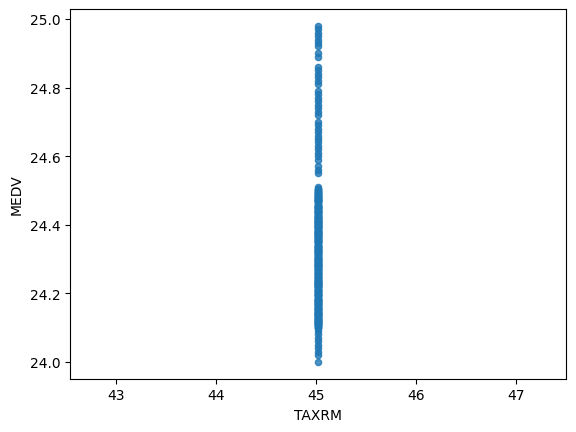

In [27]:
housing.plot(kind="scatter", x="TAXRM", y="MEDV", alpha=0.8)

In [28]:
housing = strat_train_set.drop("MEDV", axis=1)
housing_labels = strat_train_set["MEDV"].copy()
housing.shape

(404, 13)

In [29]:
housing = strat_train_set.drop("MEDV",axis=1)
housing_labels = strat_train_set["MEDV"].copy()

## Missing Attributes

In [30]:
# To take care of missing attributes, you have three options:
# 1. Get rid of the missing data points
# 2. Get rid of the whole attribute
# 3. Set the value to some value(0, mean or median)

In [31]:
a = housing.dropna(subset=["RM"]) 
a.shape

(404, 13)

In [32]:
housing.drop("RM",axis=1).shape

(404, 12)

In [33]:
median = housing["RM"].median()
median

6.575

In [34]:
housing["RM"].fillna(median)

242    6.575
354    6.575
44     6.575
177    6.575
73     6.575
       ...  
473    6.575
72     6.575
367    6.575
198    6.575
132    6.575
Name: RM, Length: 404, dtype: float64

In [35]:
housing.shape

(404, 13)

In [36]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,4.040000e+02,404.0,4.040000e+02,404.0,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,404.0,404.0,4.040000e+02,4.040000e+02,4.040000e+02
mean,6.320000e-03,18.0,2.310000e+00,0.0,5.380000e-01,6.575000e+00,6.520000e+01,4.090000e+00,1.0,296.0,1.530000e+01,3.969000e+02,4.980000e+00
std,8.684372e-19,0.0,4.446398e-16,0.0,1.111600e-16,2.667839e-15,1.422848e-14,8.892797e-16,0.0,0.0,1.778559e-15,5.691390e-14,1.778559e-15
min,6.320000e-03,18.0,2.310000e+00,0.0,5.380000e-01,6.575000e+00,6.520000e+01,4.090000e+00,1.0,296.0,1.530000e+01,3.969000e+02,4.980000e+00
25%,6.320000e-03,18.0,2.310000e+00,0.0,5.380000e-01,6.575000e+00,6.520000e+01,4.090000e+00,1.0,296.0,1.530000e+01,3.969000e+02,4.980000e+00
50%,6.320000e-03,18.0,2.310000e+00,0.0,5.380000e-01,6.575000e+00,6.520000e+01,4.090000e+00,1.0,296.0,1.530000e+01,3.969000e+02,4.980000e+00
75%,6.320000e-03,18.0,2.310000e+00,0.0,5.380000e-01,6.575000e+00,6.520000e+01,4.090000e+00,1.0,296.0,1.530000e+01,3.969000e+02,4.980000e+00
max,6.320000e-03,18.0,2.310000e+00,0.0,5.380000e-01,6.575000e+00,6.520000e+01,4.090000e+00,1.0,296.0,1.530000e+01,3.969000e+02,4.980000e+00


In [37]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [38]:
imputer.statistics_

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

In [39]:
X = imputer.transform(housing)

In [40]:
housing_tr = pd.DataFrame(X, columns=housing.columns)
                          

In [41]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,4.040000e+02,404.0,4.040000e+02,404.0,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,404.0,404.0,4.040000e+02,4.040000e+02,4.040000e+02
mean,6.320000e-03,18.0,2.310000e+00,0.0,5.380000e-01,6.575000e+00,6.520000e+01,4.090000e+00,1.0,296.0,1.530000e+01,3.969000e+02,4.980000e+00
std,8.684372e-19,0.0,4.446398e-16,0.0,1.111600e-16,2.667839e-15,1.422848e-14,8.892797e-16,0.0,0.0,1.778559e-15,5.691390e-14,1.778559e-15
min,6.320000e-03,18.0,2.310000e+00,0.0,5.380000e-01,6.575000e+00,6.520000e+01,4.090000e+00,1.0,296.0,1.530000e+01,3.969000e+02,4.980000e+00
25%,6.320000e-03,18.0,2.310000e+00,0.0,5.380000e-01,6.575000e+00,6.520000e+01,4.090000e+00,1.0,296.0,1.530000e+01,3.969000e+02,4.980000e+00
50%,6.320000e-03,18.0,2.310000e+00,0.0,5.380000e-01,6.575000e+00,6.520000e+01,4.090000e+00,1.0,296.0,1.530000e+01,3.969000e+02,4.980000e+00
75%,6.320000e-03,18.0,2.310000e+00,0.0,5.380000e-01,6.575000e+00,6.520000e+01,4.090000e+00,1.0,296.0,1.530000e+01,3.969000e+02,4.980000e+00
max,6.320000e-03,18.0,2.310000e+00,0.0,5.380000e-01,6.575000e+00,6.520000e+01,4.090000e+00,1.0,296.0,1.530000e+01,3.969000e+02,4.980000e+00


## Scikit-learn Design

Primarily, three types of objects

Estimators - It estimates some parameter based on a dataset. Eg. imputer. It has a fit method and transform method. Fit method - Fits the dataset and calculates internal parameters

Transformers - transform method takes input and returns output based on the learnings from fit(). It also has a convenience function called fit_transform() which fits and then transforms.

Predictors - LinearRegression model is an example of predictor. fit() and predict() are two common functions. It also gives score() function which will evaluate the predictions.


## Feature Scaling


## Creating a Pipeline

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
     ('imputer', SimpleImputer(strategy="median")),
      # ...... add as many as you want in your pipeline
      ('std_scaler', StandardScaler()),
      ])

In [43]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [44]:
housing_num_tr.shape

(404, 13)

## Selecting a desired model for Dragon Real Estates

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model = LinearRegression()
#model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

In [46]:
some_data = housing.iloc[:5]

In [47]:
some_labels = housing_labels.iloc[:5]

In [48]:
prepared_data = my_pipeline.transform(some_data)

In [49]:
model.predict(prepared_data)

array([24.33543933, 24.33543933, 24.33543933, 24.33543933, 24.33543933])

In [50]:
list(some_labels)

[24.242, 24.354, 24.44, 24.177, 24.73]

## Evaluating the model

In [51]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)

In [52]:
mse

0.03368136779629508

## Using better evaluation technique -Cross Validation

In [53]:
# 1 2 3 4 5 6 7 8 9 10
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10 )
rmse_scores = np.sqrt(-scores)

In [54]:
rmse_scores

array([0.17773378, 0.19100071, 0.15033994, 0.19072616, 0.22987888,
       0.18693099, 0.15898357, 0.17764601, 0.16741116, 0.19724073])

In [55]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean: ", scores.mean())
    print("Standard deviations: ",scores.std())

In [56]:
print_scores(rmse_scores)

Scores: [0.17773378 0.19100071 0.15033994 0.19072616 0.22987888 0.18693099
 0.15898357 0.17764601 0.16741116 0.19724073]
Mean:  0.18278919264769422
Standard deviations:  0.021170780110465272


## Saving the model

In [57]:
from joblib import dump, load
dump(model, 'Dragon.joblib')

['Dragon.joblib']

## Testing the model on test data

In [58]:
X_test = strat_test_set.drop("MEDV", axis=1)
Y_test = strat_test_set["MEDV"].copy()

X_test_prepared = my_pipeline.transform(X_test)


final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
#print(final_predictions,list(Y_test))


In [59]:
final_rmse

0.17955870261347964

In [64]:
prepared_data[0]

array([-8.67361738e-19,  0.00000000e+00,  4.44089210e-16,  0.00000000e+00,
       -1.11022302e-16, -2.66453526e-15, -1.42108547e-14, -8.88178420e-16,
        0.00000000e+00,  0.00000000e+00, -1.77635684e-15, -5.68434189e-14,
       -1.77635684e-15])

## Using the model

In [62]:
from joblib import dump, load
import numpy as np
model = load('Dragon.joblib')
features = np.array([[-9.67361738e-19,  0.00000000e+00,  1.3333389210e-16,  7.9999000000e+00,
       -2.1122022302e-16, -2.99999953526e-15, -6.42108547e-14, -8.88178420e-16,
        0.10000000e+00,  0.00000000e+00, -1.77635684e-15, -5.68434189e-14,
       -1.77635684e-15]])
model.predict(features)

array([24.33543933])